In [1]:
#!/usr/bin/env python
# vim: set fileencoding=utf-8 :
__author__ = ' AUTHORS:    Ivan Mendez Jimenez y Miguel Cardenas Montes'
''' ANN unidimensional en Keras para contaminantes Madrid '''
''' RNN Bidireccional en Keras ''' # using TensorFlow backend

' RNN Bidireccional en Keras '

In [3]:
# General:
##########
import os
import math
from math import sqrt
import sys
import numpy
import numpy as np
import random
import scipy.stats
from pylab import *
from time import time
import pandas as pd

# Plots:
########
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'large'

# Neural Networks utils:
########################
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import keras.backend as K

# Scikit-learn utils:
#####################
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

In [4]:
def personalloss(y_true, y_pred):
	return K.sum(y_true*K.square((y_true-y_pred)))

# $Main\ Code:$

## $1)\ Data\ preprocessing:$

### $1.1)\ Loading\ data:$

In [5]:
NO2 = [27.29,48.69,57.37,56.1,50.31,39.18,28.17,25.36,34.83,50.22,62.85,65.02,68.93,32.38,74.82,61.68,51.11,56.88,60.37,48.04,79.53,77.55,47.28,41.11,26.65,29.19,28.73,73.33,75.86,29.58,29.28,41.49,61.95,71.85,67.9,40.03,43.42,63.69,60.49,36.14,45.36,29.44,43.57,25.39,34.9,47.27,46.15,42.9,46.76,55.11,38.65,43.35,50.37,52.03,33.87,43.32,52.69,43.85,25.88,37.44,33.88,44.4,56.74,36.69,27.56,35.66,20.19,34.38,35.42,37.75,41.01,43.13,26.45,61.81,51.91,52.64,67.09,49.7,41.92,33.01,46.29,48.34,40.04,40.35,31.03,27.8,41.34,50.44,28.49,24.15,17.8,28.11,28.7,28.03,27.37,46.47,27.65,27.54,25.05,24.08,28.44,23.32,28.03,31.34,33.53,43.3,38.24,35.61,55.83,48.35,49.37,38.15,56.33,40.37,42.9,44.89,47.95,43.95,33.91,39.19,22.91,21.65,14.1,12.84,23.1,38.3,35.58,26.37,19.32,30.92,43.42,24.92,30.93,25.58,17.76,16.29,25.57,29.33,25.11,26.2,38.42,40.31,24.17,29.11,25.58,30.43,31.16,25.15,23.05,28.91,31.88,31.7,32.31,23.81,34.33,31.33,25.16,25.78,26.38,32.61,25.93,24.17,28.75,14.25,25.66,17.98,34.21,41.96,44.39,18.53,10.05,31.67,42.07,49.53,42.05,38.59,25.29,22.75,26.34,25.41,46.41,46.11,64.12,26.36,30.41,35,34.17,40.39,50.69,53.49,38.67,38.31,36.07,48.02,32.94,48.45,65.83,33.98,25.61,60.19,44.86,36.86,33.79,18.21,15.48,12.67,18.3,34.95,54.41,27.17,24.28,0,0,32.16,12.56,16.81,11.63,13.85,16.71,19.35,17.4,19.7,20.47,13.65,4.46,6.89,5.66,8.76,13.92,18.73,16.34,20,16.58,9.43,21.3,48.76,90.74,87.7,59.47,29.04,27.79,51.73,60.67,36.99,72.38,71.73,72.47,77.6,103,29.81,38.84,64.81,85,77.81,62.13,65.05,93.73,99.72,81.47,41.67,27.52,31.97,47.52,55.29,54.53,53.05,26.91,16.74,25.58,52.93,63.38,55.32,71.06,77.19,68.89,37.23,27.21,64.44,78.17,52.17,51.47,35.16,34.96,51.2,26.51,53.92,62.36,59.92,39.65,21.33,48.5,83.97,94.14,77.09,84.17,82.21,61.88,25.66,79.09,102.4,114.3,69.23,35.44,20.28,16.26,48.88,100.9,74.47,60.18,64.56,52.45,47.77,25.21,50.93,60.48,73.61,59.06,45.49,36.77,64.31,49.9,60.98,70.78,38.38,31.37,50.17,79.98,66.93,64.05,52.95,44.42,61.87,52.13,54.5,45.45,51.11,59.36,61.08,58.19,48.51,50.35,46.97,52.85,51.79,51.14,62.25,86.86,54.51,26.3,66.63,113.8,77.8,41.56,67.64,73.26,60.45,45.95,49.18,44.93,63.99,85.53,86.2,76.4,68.63,55.6,41,52,72,61,63,41,50,49,47,62,45,79,70,66,56,51,73,69,75,55,35,35,34,63,79,77,61,57,46,54,45,53,66,106,113,91,77,94,91,102,82,79,57,38,27,53,42,34,72,58,30,27,32,67,60,76,75,7,17,13,25,36,47,33,37,32,31,29,42,48,26,28,33,30,39,35,57,38,43,21,14,25,33,34,31,16,29,30,37,76,57,48,48,37,41,41,56,84,57,39,22,37,52,62,32,19,20,34,27,27,20,19,21,14,21,25,39,44,32,28,25,30,47,44,56,29,28,35,45,37,38,41,39,33,12,22,38,29,22,36,34,29,41,40,52,42,42,30,17,31,21,14,17,25,28,21,47,45,31,43,39,28,26,47,42,47,47,46,24,32,52,49,47,30,31,35,31,42,49,27,32,35,38,23,38,42,33,32,35,22,29,54,42,14,26,38,36,12,24,17,35,40,21,15,10,18,37,22,37,42,23,17,38,26,39,43,41,21,16,21,18,33,36,50,27,31,46,62,53,49,35,29,18,22,39,36,43,22,30,23,61,59,33,32,27,41,27,44,52,79,69,66,49,32,65,74,53,49,59,46,18,30,67,73,88,60,26,55,62,66,59,55,40,23,33,64,65,69,77,25,16,23,59,74,59,74,74,44,53,73,82,71,25,52,45,28,36,32,46,38,34,30,37,51,48,39,42,49,32,36,74,60,59,52,56,21,17,39,54,58,46,44,22,29,42,48,30,52,52,46,50,71,67,68,60,47,58,55,63,45,62,58,60,52,36,45,41,37,46,34,38,37,78,87,91,91,87,29,50,62,70,76,42,87,91,58,30,74,85,99,55,55,62,64,54,56,73,75,81,57,35,41,69,75,63,44,59,43,54,69,79,42,22,16,62,79,75,21,16,11,31,44,25,26,48,53,31,24,26,52,34,36,49,55,48,37,75,65,79,76,66,75,51,72,70,62,54,39,31,26,37,48,56,49,39,42,63,70,71,46,44,31,18,16,20,37,64,43,38,41,38,32,34,31,45,51,46,38,36,46,27,19,18,39,42,40,23,35,23,19,12,12,31,22,23,29,25,16,22,20,35,32,35,26,24,34,33,31,52,38,26,22,36,29,44,41,41,44,23,27,16,37,39,32,17,19,23,26,26,44,43,18,23,28,30,54,39,37,25,13,36,29,23,20,25,28,11,15,15,33,29,26,24,18,31,25,31,23,37,31,23,26,0,43,35,23,14,8,30,48,30,22,24,26,16,38,28,36,31,39,14,13,17,30,38,56,37,11,11,25,24,26,29,25,21,23,35,44,37,40,30,30,20,22,21,27,47,51,36,15,31,19,7,29,41,33,22,39,45,35,33,26,13,23,36,41,33,20,9,8,9,11,16,33,41,50,31,31,46,60,47,13,48,47,51,68,60,19,26,34,46,26,19,24,30,32,27,15,30,71,83,84,86,70,45,58,66,62,39,24,26,24,26,39,56,69,51,39,26,40,61,59,50,38,44,31,17,60,44,46,28,38,41,37,41,33,30,43,35,25,14,33,34,33,37,40,32,27,51,59,58,48,64,55,55,49,46,49,45,42,35,68,86,50,36,62,52,45,59,86,69,72,73,51,30,26,48,63,60,47,43,41,34,44,44,65,71,70,60,55,51,48,50,67,85,88,69,58,49,55,73,59,35,21,45,32,36,37,29,28,20,31,47,27,36,63,48,49,50,80,76,79,62,18,20,90,64,24,34,30,35,37,26,42,59,67,61,53,46,53,34,38,40,34,17,26,34,47,36,23,37,38,25,27,45,42,36,52,29,19,25,29,20,32,54,36,44,21,52,41,51,60,37,18,30,27,27,12,13,12,22,26,30,48,33,25,24,30,28,26,29,23,32,43,21,31,46,46,49,16,13,18,14,25,36,18,23,9,8,20,32,28,18,15,26,30,32,31,44,29,31,18,13,28,34,20,31,27,20,21,34,21,31,25,24,27,12,31,20,17,25,20,9,7,24,32,33,26,24,13,16,32,31,32,39,28,34,32,20,18,22,31,29,19,22,15,20,19,21,16,8,20,29,24,38,7,6,4,5,8,8,7,7,6,6,3,5,7,6,6,8,5,3,6,9,7,9,8,5,2,7,9,8,22,25,20,28,43,31,21,12,24,16,21,30,14,26,27,31,13,20,33,21,30,45,56,24,9,11,15,14,14,20,25,15,34,44,37,22,34,27,25,37,36,23,42,48,49,39,44,44,30,31,26,26,31,66,72,61,73,50,19,11,27,19,41,42,37,38,20,42,54,51,48,38,23,33,47,43,56,57,70,47,24,54,44,43,43,45,43,50,58,28,38,76,53,46,37,34,29,53,36,41,27,37,56,48,22,29,28,33,35,55,46,41,41,35,37,25,49,38,28,42,72,59,35,65,75,97,60,1,71,73,66,59,60,76,80,56,44,47,65,61,51,36,64,61,70,44,23,34,37,25,45,67,53,36,37,38,22,34,43,46,57,55,59,59,59,43,34,49,40,41,37,35,43,56,47,43,73,36,49,24,34,39,33,38,18,33,56,39,33,32,31,26,30,23,51,53,41,32,38,43,60,48,83,57,29,42,36,44,36,33,55,28,22,15,18,23,32,68,59,45,29,48,45,42,51,60,44,49,63,65,40,52,46,16,19,54,21,21,59,37,33,30,45,41,49,30,23,30,37,43,47,48,51,42,18,34,39,35,41,22,14,31,8,34,27,27,34,19,21,11,22,33,29,18,21,7,28,48,47,64,50,32,26,22,28,10,18,13,18,16,14,28,27,24,24,25,16,17,22,22,24,27,15,6,6,23,29,21,32,41,14,23,33,33,30,27,36,11,7,12,26,27,17,22,15,24,36,27,29,39,32,28,10,26,25,22,20,32,28,14,19,30,10,11,15,11,17,40,34,55,54,37,13,10,27,38,35,30,45,30,19,30,8,24,31,21,10,11,29,22,32,27,30,23,15,25,22,12,13,14,9,16,24,25,28,25,23,23,21,44,22,31,38,35,17,20,37,33,36,27,43,25,27,30,38,39,27,39,33,29,35,34,27,34,32,37,20,27,30,47,32,39,28,21,45,47,29,32,49,38,33,41,25,33,24,38,24,15,24,41,42,29,37,33,24,47,57,36,65,44,34,25,61,58,60,65,55,53,37,38,26,41,45,35,33,32,46,46,34,46,38,24,25,45,70,57,40,47,37,31,48,52,45,45,42,46,43,37,33,37,36,66,33,33,84,50,94,108,74,50,29,47,87,96,101,82,56,45,54,70,54,42,67,57,16,34,97,104,107,106,89,80,82,78,88,81,101,87,63,57,68,78,60,41,54,40,39,86,63,51,62,53,35,86,61,92,61,30,20,17,42,37,24,24,37,44,41,39,54,61,56,50,26,24,40,16,27,58,78,33,40,31,26,47,52,40,43,16,26,27,18,26,67,77,45,74,80,90,91,46,16,22,56,42,34,17,19,17,18,47,23,13,42,34,43,31,52,60,22,24,18,15,22,24,24,22,30,40,24,19,26,25,37,31,37,39,19,36,29,30,51,60,19,24,26,39,35,50,22,19,28,37,20,43,60,31,46,33,48,54,68,46,8,9,14,29,21,13,12,12,7,9,17,15,19,39,44,29,19,32,35,34,16,32,20,16,31,27,36,32,29,27,11,26,22,16,23,22,20,26,46,33,27,38,63,34,38,47,44,41,36,28,20,33,53,56,45,35,47,29,22,39,49,50,64,38,18,19,28,36,26,31,49,16,20,35,43,39,26,28,18,28,39,31,45,48,51,22,15,32,35,40,13,20,11,14,21,17,25,39,39,15,9,15,41,42,38,55,21,14,39,40,32,33,20,19,24,35,44,52,52,44,44,14,25,36,29,38,47,43,45,61,62,34,40,54,44,37,38,41,51,58,42,52,35,35,27,54,55,70,52,28,31,42,49,70,69,41,34,43,30,48,70,73,63,38,38,34,34,54,58,30,22,39,48,63,68,72,41,36,59,86,84,94,64,58,55,76,80,78,87,70,21,34,40,102,49,67,59,68,61,78,98,119,88,86,69,57,55,55,61,60,57,44,60,63,81,73,89,85,72,68,92,84,81,69,51,49,27,53,49,54,49,41,30,39,26,31,27,23,36,31,21,31,49,72,65,29,32,61,52,74,76,66,57,46,40,59,57,58,63,49,41,52,68,76,33,47,60,47,33,45,31,31,39,32,22,22,25,24,60,38,45,50,49,59,67,63,39,37,14,16,25,51,45,49,53,21,22,23,29,50,19,20,42,29,35,43,76,54,41,30,32,36,28,33,38,51,38,14,28,35,52,19,19,35,33,55,19,30,36,19,33,18,35,41,35,41,44,27,18,27,33,37,35,45,38,16,42,46,50,23,30,21,9,24,41,52,43,34,21,21,38,48,43,26,31,28,17,19,31,41,20,39,30,12,30,33,25,38,40,26,13,32,22,33,40,47,24,21,44,43,54,43,34,18,21,19,19,18,19,23,12,12,27,32,30,28,44,18,12,37,37,42,43,39,36,15,26,28,31,28,46,30,30,38,26,13,16,27,30,26,27,35,36,47,24,8,9,16,34,24,34,30,28,14,25,37,39,40,14,15,20,39,32,10,19,27,24,18,17,28,37,33,31,13,14,28,37,26,31,29,23,39,26,31,39,25,47,48,51,51,64,49,43,34,22,36,53,28,24,28,30,16,18,47,37,50,70,78,53,53,36,26,23,45,54,42,47,48,63,62,67,60,56,31,40,56,25,30,31,42,39,40,31,47,36,37,38,19,32,31,30,44,49,49,45,72,53,63,71,57,30,27,51,44,36,74,76,63,38,35,49,75,90,86,52,32,44,52,49,55,45,38,30,40,45,34,42,60,44,25,30,42,60,51,54,54,49,88,70,56,50,41,19,17,34,73,59,74,51,43,39,56,56,65,69,78,49,43,49,68,72,64,50,52,57,76,78,49,59,35,40,46,66,30,35,31,27,34,49,54,79,85,73,50,36,48,47,47,55,49,44,25,18,41,48,35,77,58,31,27,37,52,41,50,53,70,35,44,55,57,55,44,54,44,29,32,51,70,51,28,28,33,38,88,78,67,51,17,12,26,29,40,41,52,52,29,31,29,43,40,54,23,37,51,63,51,40,14,17,37,45,15,25,34,36,24,43,40,44,36,35,32,26,43,19,18,16,25,28,38,44,34,23,12,17,23,20,19,33,42,52,30,14,24,38,38,19,23,31,18,23,29,34,30,26,30,29,27,53,19,33,39,36,19,13,26,21,33,35,40,15,10,28,22,33,34,39,45,34,37,35,44,57,51,27,20,33,34,48,49,37,29,28,27,37,15,15,19,6,10,29,30,26,32,34,31,42,34,51,62,55,39,21,26,44,34,26,31,37,24,19,21,11,34,40,64,58,36,39,35,44,39,41,24,11,25,15,15,9,14,21,28,24,14,45,40,47,13,17,32,28,51,35,47,39,16,35,24,30,23,18,28,36,26,46,36,21,50,15,15,37,28,56,48,13,16,27,40,61,58,64,40,40,55,45,39,68,74,69,58,20,38,50,39,73,28,38,57,66,74,91,64,56,61,40,44,56,43,51,54,35,32,56,64,69,82,42,33,28,33,46,45,60,56,37,25,24,67,47,20,47,70,62,36,74,87,101,94,56,61,82,84,85,105,83,57,32,69,75,42,44,34,41,37,69,76,63,77,85,57,23,30,60,71,43,42,39,39,84,75,110,89,101,50,51,39,45,25,42,47,39,34,31,39,47,41,36,23,27,50,72,52,39,78,66,33,65,67,60,74,69,81,59,56,51,62,62,30,16,19,58,66,71,69,29,45,23,36,25,44,47,79,30,49,36,55,38,59,46,34,19,29,23,20,50,48,66,56,77,64,61,34,51,30,26,35,37,39,53,51,37,16,27,51,45,28,29,27,20,34,19,16,50,61,13,16,38,40,45,12,10,14,31,38,27,22,45,51,34,21,28,41,33,34,39,38,22,25,53,49,26,24,22,29,41,35,46,38,28,15,11,24,19,30,38,18,15,16,31,43,35,20,34,16,11,17,12,24,27,31,22,16,33,47,46,30,47,33,21,36,44,37,32]
O3  = [41.26,18.9,9.39,10.61,16.99,27.68,31.36,43.84,34.25,20.52,20.84,11.63,11.71,41.16,13.3,8.91,10,9.33,10.16,24.62,6.71,7.06,22.89,25.49,38.38,38.54,35.22,16.36,20.22,44,43.76,36.65,23.09,14.31,9.51,36.46,32.71,14.37,13.61,35.54,26.57,42.84,40.79,47.2,40.03,20.7,20.42,31.85,29.55,25.37,40.43,27.23,31.17,29.68,41.64,30.38,32.42,22.53,53.27,43.35,35.86,32.77,23.21,31.76,41.8,33.24,53.5,46.77,47.5,44.43,33.72,37.7,47.09,31.29,35.87,36.3,25.05,20.46,24.5,25.68,27.08,28.93,32.5,42.93,46.11,50.26,37.97,34.57,46.76,53.44,58.34,50.6,43.24,46.66,48.6,40.91,54.79,52.96,60.86,63.74,67.88,65.45,50.63,32.49,40.06,35.74,43.62,42.66,31.87,35.43,35.6,43.87,35.31,36.98,41.47,42.28,47.84,54.29,56.54,49.96,54.94,51.83,56.22,65.57,64.2,49.42,46.22,37.46,43.76,45.79,43.27,53.15,47.22,50.3,55.29,54.75,50.63,54.47,46.31,62.86,55.04,58.09,71.04,68.97,73.73,66.89,57.87,59.33,62.8,58.59,46.55,47.18,49.2,68.08,72.12,66.65,70.54,62.6,56.54,34.83,45.4,51.24,38.26,52.1,44.4,52.79,46.4,59.99,50.79,69.78,71.26,63.52,52.98,58.52,73.4,81.7,89.86,77.64,88.18,93.28,82.42,85.3,56.99,92.69,91.63,86.75,98.11,88.74,55.01,92.23,101.5,94.33,81.61,72.06,82.66,70.32,67.98,97.59,90.73,79.54,82.92,64.31,57.79,73.75,84.01,74.39,69.92,71.74,62.44,74.38,67.11,75.94,81.92,72.54,70.04,66.4,65.72,78.56,77.4,58.21,57.89,55.19,69.58,70.14,66.52,78.82,79.39,70.8,56.87,73.95,55.31,52.47,67.01,78.81,52.83,55.13,49.83,49.14,52.92,79.61,77.26,76.41,62.1,52.66,37.88,54.81,67.12,66.96,35.76,57.67,59.06,53.2,46.87,49.82,51.88,54.3,48.3,33.02,33.25,32.51,38.62,43.56,30.95,29.56,36.5,36.8,54.07,63.89,57.27,36.73,32.38,39.59,31.8,30.58,38.12,44.29,42.4,25.38,27.4,40.65,27.36,28.72,39.37,22.73,39.05,27.69,24.95,32.74,37.81,50.42,35.47,15.29,15.95,25.38,17.58,25.06,30.11,51.55,21.43,11.08,7.67,24.77,37.43,53.24,57.8,34.82,7.25,18.2,16.22,18.69,18.27,45.73,61.69,39.66,25.39,11.55,17.39,25.05,46.16,22.65,27.59,29.98,12.15,42.23,46.21,34.48,15.27,17.26,16.81,31.95,27.21,22.25,16.15,18.97,32.01,30.83,28.72,21.67,16.87,23.34,27.11,32.38,17.45,18.43,8.22,6.15,5.94,18.44,47.12,25.5,5.83,11.23,17.17,17.44,16.7,29.13,30.63,30.21,26.04,13.29,5.68,5.66,10.48,8.93,14.99,23,17,11,9,8,22,25,31,35,17,34,11,7,9,16,19,6,9,7,20,53,51,46,33,21,22,18,30,32,21,40,34,35,9,7,11,22,19,15,8,17,16,24,36,51,25,38,56,22,13,38,57,50,25,19,14,18,68,64,65,53,43,35,56,46,53,66,54,37,29,46,48,46,48,49,51,35,49,45,66,78,57,48,49,38,60,61,60,61,26,42,43,28,43,40,43,38,34,47,59,74,70,51,49,82,85,94,85,79,58,69,76,67,75,74,85,91,83,77,61,62,49,37,43,38,54,45,41,39,47,44,42,45,42,47,41,36,40,34,39,56,56,55,61,59,67,43,55,66,43,54,62,60,78,68,69,46,41,53,54,56,54,58,51,60,62,57,54,62,70,57,53,51,78,76,75,73,67,63,71,73,69,63,70,79,72,67,69,58,66,80,75,69,80,76,74,84,73,62,60,58,65,77,73,58,62,66,71,75,85,110,95,86,87,88,92,71,76,74,84,75,73,79,64,73,71,51,49,56,57,69,67,69,62,57,62,49,53,52,58,51,53,44,44,56,39,52,49,51,49,52,58,64,52,46,49,49,50,53,59,61,44,39,45,37,40,58,38,43,42,34,38,47,54,48,34,43,35,19,42,45,32,27,22,32,21,24,35,34,27,18,24,44,27,34,37,28,33,21,23,24,27,23,14,18,24,26,19,28,29,3,15,10,6,10,33,43,26,16,15,13,24,39,21,14,11,26,20,15,20,8,5,4,6,4,15,10,4,5,18,3,6,3,2,6,9,18,20,22,26,23,22,5,2,2,4,4,29,26,13,9,9,31,7,4,10,34,7,5,3,20,14,14,12,16,17,7,3,6,3,24,31,13,5,13,22,8,16,21,11,6,21,42,47,19,8,9,46,47,42,32,26,36,35,20,28,40,38,33,23,34,32,27,27,32,35,16,26,24,19,23,27,32,27,25,29,27,36,33,40,32,30,33,30,36,31,25,25,30,37,37,41,40,36,35,23,17,36,45,37,35,41,41,39,33,39,44,41,36,22,38,42,38,28,32,35,39,32,38,39,39,38,31,37,38,36,32,40,37,40,36,34,29,49,40,35,38,36,30,41,41,42,40,31,34,50,51,50,56,57,70,57,58,64,49,49,49,45,48,56,65,61,54,55,59,51,68,64,66,65,59,63,39,50,59,54,47,54,44,55,71,54,42,49,43,48,59,63,69,74,80,70,0,58,65,65,69,57,50,53,60,64,54,54,62,57,64,61,67,57,60,66,60,54,66,48,51,61,59,52,66,69,62,65,69,69,65,59,56,51,64,60,48,54,54,57,44,33,46,68,54,52,51,45,44,52,54,41,33,42,52,58,56,56,56,49,40,57,50,53,57,57,53,54,57,54,65,59,49,40,41,51,34,42,45,31,28,55,48,47,38,34,51,45,37,24,15,36,34,19,21,28,29,31,34,23,24,16,16,34,27,38,42,34,19,21,25,30,33,21,11,16,9,22,25,29,47,15,13,20,36,30,17,20,31,27,27,10,19,38,45,30,29,25,19,20,25,23,14,4,11,20,8,10,9,22,24,21,30,26,29,11,5,26,38,11,7,25,15,4,12,8,5,18,39,37,26,4,4,18,24,14,14,10,13,10,4,6,5,6,7,17,26,22,9,4,5,4,5,7,4,10,29,51,32,39,30,32,29,39,41,36,26,42,33,20,34,20,30,7,6,6,14,51,47,10,15,49,37,40,39,35,44,32,18,12,18,16,16,21,29,30,32,39,47,40,39,32,34,45,43,40,48,42,27,33,33,32,46,51,44,44,50,41,33,42,27,50,25,37,31,27,45,51,40,32,42,49,43,56,42,46,45,28,42,49,53,42,47,46,41,40,43,37,50,46,37,51,49,70,82,78,79,70,70,78,66,68,71,56,51,54,57,70,71,67,63,57,49,52,53,74,81,72,69,65,55,59,61,68,53,65,65,64,61,66,77,58,68,67,58,77,87,79,75,76,81,88,77,81,74,72,71,50,47,55,80,76,71,70,68,76,68,77,61,83,87,83,84,96,62,85,76,88,73,57,73,93,115,101,100,87,88,95,93,102,87,92,100,102,91,97,91,77,58,62,60,55,69,71,59,67,73,66,65,77,74,55,57,69,74,75,83,79,74,86,77,76,69,92,79,72,76,72,66,70,74,79,72,78,73,78,76,82,93,73,63,68,84,73,66,64,56,63,43,54,47,51,53,43,39,47,45,45,52,57,32,32,39,32,35,48,48,27,20,16,16,24,32,51,44,34,42,38,45,59,47,26,29,17,18,27,30,36,21,22,30,16,18,23,21,17,46,37,12,21,21,16,30,40,12,18,23,47,38,21,20,37,37,49,33,19,10,31,41,41,38,34,44,33,40,49,34,17,17,38,18,21,14,11,20,17,13,16,21,20,15,3,15,19,25,11,7,28,46,15,16,7,30,59,45,32,55,42,11,20,29,33,36,60,44,32,22,11,13,13,13,4,32,41,22,35,36,39,38,45,26,27,46,23,34,22,59,49,47,47,42,61,47,23,41,52,44,47,53,47,64,30,18,28,29,45,33,16,27,16,17,60,44,42,44,42,58,31,54,53,45,67,59,47,22,44,50,74,54,69,68,48,37,61,50,38,42,64,49,46,68,72,37,76,69,39,59,58,54,42,49,42,61,68,42,33,37,41,48,43,47,74,65,64,70,60,79,93,59,77,44,57,52,52,78,55,79,56,55,55,69,68,77,74,60,57,41,66,75,77,67,69,82,90,95,96,107,109,93,75,72,62,68,81,79,75,78,64,55,72,85,87,87,81,79,85,65,63,67,70,67,82,86,88,112,111,107,111,114,96,89,85,73,66,69,89,73,75,53,94,77,76,79,52,69,90,53,67,79,80,90,82,78,78,71,83,72,64,74,71,70,74,80,85,99,82,102,110,95,82,89,84,92,82,68,66,94,82,78,62,60,83,70,73,77,88,92,86,82,77,78,86,68,75,76,81,67,58,48,47,59,71,72,66,69,64,56,49,53,52,67,64,63,65,50,51,56,44,50,46,36,32,34,64,46,50,37,58,54,59,61,31,40,48,43,40,50,63,46,43,30,19,23,32,63,52,44,25,19,23,31,46,29,24,41,23,27,34,37,23,21,24,21,26,26,33,32,54,41,30,38,48,51,29,27,39,20,38,50,44,39,11,17,26,20,17,22,19,12,31,24,40,32,22,42,40,21,26,13,45,55,13,38,16,7,8,24,42,30,8,7,6,6,13,22,22,21,16,28,14,10,64,52,14,5,10,8,9,14,12,10,13,15,9,10,14,25,12,9,16,46,33,28,42,10,25,37,27,33,51,17,26,8,22,33,61,66,36,46,60,59,46,22,39,43,34,21,25,35,55,47,37,66,53,31,24,52,45,42,63,45,26,45,37,46,16,9,42,54,35,24,41,30,24,22,22,39,72,66,38,51,56,60,64,59,57,24,55,78,41,30,30,49,46,36,63,67,53,67,69,62,72,85,63,52,59,67,67,72,65,49,55,53,73,59,71,74,52,41,66,54,61,49,57,40,51,25,44,38,74,58,53,63,58,73,71,73,40,63,86,80,78,74,61,79,82,83,84,76,70,68,73,77,65,74,79,69,70,79,93,84,99,103,101,96,66,54,62,75,85,73,67,75,90,76,88,92,78,82,89,86,68,101,94,92,80,85,69,88,94,80,54,55,65,83,78,106,104,106,98,104,68,93,99,65,69,59,131,80,62,90,84,58,66,62,59,50,92,79,71,88,76,71,61,78,86,75,67,69,72,70,77,67,61,76,81,72,64,82,61,75,67,66,59,53,84,71,39,56,68,82,76,76,75,57,60,52,40,55,49,77,52,47,20,24,27,37,39,37,37,32,29,30,35,42,36,36,32,30,43,28,19,12,19,16,20,16,26,21,15,12,19,15,15,19,8,18,35,30,18,12,14,35,30,40,46,25,17,42,53,41,30,7,12,8,14,23,20,9,11,15,21,20,13,5,5,8,5,9,50,42,35,5,33,32,34,19,22,15,16,3,3,3,4,8,5,4,10,8,9,19,8,7,5,7,8,7,6,8,9,13,8,4,10,13,27,16,17,14,10,20,37,23,28,47,42,40,30,44,52,48,34,9,6,39,47,13,23,20,6,8,5,10,16,9,10,5,12,22,24,24,9,4,38,39,23,21,59,37,48,44,36,33,29,62,62,61,31,45,47,44,40,34,35,20,50,36,66,58,63,31,33,47,34,62,58,59,59,33,67,66,45,67,72,54,34,43,48,49,45,45,57,55,60,40,27,68,46,47,42,68,74,62,60,27,62,64,58,72,58,70,48,43,54,45,38,40,70,59,40,43,54,42,34,65,57,50,43,62,48,59,79,81,70,70,70,47,56,50,41,30,46,61,46,52,77,86,82,59,71,50,67,72,58,52,59,54,58,63,55,58,72,76,78,69,83,77,54,58,55,65,72,78,66,50,61,51,52,59,66,68,45,61,70,78,56,77,73,68,62,56,59,61,65,76,70,78,64,54,65,83,76,59,71,68,71,77,76,78,80,72,47,59,75,56,68,80,76,89,76,78,80,89,71,70,79,58,57,62,63,63,63,65,72,70,76,75,74,68,64,57,61,58,72,60,51,66,68,72,69,56,72,57,57,63,52,58,45,44,37,35,66,55,76,67,43,42,40,40,39,42,49,36,49,44,32,27,44,40,43,48,37,44,34,44,35,41,36,32,26,27,34,56,46,39,39,27,29,33,33,20,20,7,5,10,7,27,30,17,10,14,15,19,35,22,25,16,10,7,25,41,20,27,36,10,8,8,23,36,30,11,3,1,12,25,32,10,14,11,13,4,3,6,11,19,16,15,17,39,27,28,6,16,14,18,13,3,5,9,15,19,53,57,45,9,17,6,8,20,17,12,18,14,12,8,10,18,19,8,6,8,19,23,14,10,9,25,13,52,44,41,27,57,49,52,54,53,33,36,17,11,14,30,54,15,22,20,12,34,48,60,75,56,35,57,18,10,35,10,11,19,34,33,28,14,43,44,35,30,13,26,35,31,53,52,38,18,32,59,45,47,55,17,23,32,38,69,78,64,67,61,64,56,52,66,58,65,47,43,34,70,62,40,35,48,55,88,79,69,59,79,81,71,82,81,62,55,66,69,53,56,75,59,81,78,77,83,83,71,59,65,71,87,82,51,65,81,59,56,52,63,77,67,66,67,70,68,51,63,56,60,70,74,52,64,77,62,55,87,74,75,87,87,98,70,80,74,85,77,87,73,62,70,77,81,70,67,85,72,90,90,68,82,93,106,94,92,80,99,94,75,69,77,63,65,80,68,83,72,64,67,93,50,47,67,76,77,70,74,72,84,108,103,84,87,86,88,85,96,100,78,82,82,73,71,64,54,57,77,74,94,67,77,83,80,92,75,76,79,84,79,74,82,69,79,65,86,83,70,88,70,73,57,48,61,31,58,64,85,73,70,75,63,60,74,65,63,78,64,40,54,42,41,61,60,59,52,34,53,51,65,68,57,56,57,41,42,39,37,52,22,25,39,32,63,60,43,38,39,35,53,47,41,50,49,29,33,27,28,29,49,33,29,27,23,36,46,54,41,40,30,24,24,35,54,58,27,39,63,37,15,15,44,20,8,5,7,19,19,13,11,10,5,8,16,38,14,2,26,33,46,38,40,14,16,17,7,2,8,39,43,22,7,17,33,33,31,6,29,3,9,2,21,15,8,24,53,32,28,24,32,46,40,15,15,32,56,43,25,5,16,46,16,6,35,15,10,15,15,11,10,12,10,12,10,9,48,60,55,27,17,18,17,50,33,46,30,44,34,36,17,58,27,46,31,37,16,14,30,58,51,59,63,44,43,31,39,24,31,19,56,35,65,64,59,51,55,36,24,44,74,62,34,33,69,59,59,72,58,69,81,53,27,79,80,58,48,32,66,89,80,56,56,62,72,44,33,58,63,70,55,65,59,57,41,48,62,33,42,67,67,54,47,33,42,42,49,57,65,73,59,64,53,48,69,75,71,37,28,48,57,46,68,70,62,76,79,83,67,67,89,66,42,50,65,48,53,63,41,29,51,59]

In [6]:
which = int(input('NO2 data: 0\nO3 data: 1\nType [0] or [1]: '))
if which == 0:
    values = NO2 # Arturo Soria
    print('##########\nNO2 chosen\n##########')
elif which == 1:
    values = O3
    print('##########\nO3 chosen\n##########')
print('Number of inputs: ', len(values))

NO2 data: 0
O3 data: 1
Type [0] or [1]: 0
##########
NO2 chosen
##########
Number of inputs:  3073


### $1.2)\ Data\ preprocessing\ and\ general\ parameters:$

In [7]:
dataset = values
sample_size = 30 
ahead = 7
nepochs=10
assert 0 < sample_size < len(dataset)
dataset = np.asarray(dataset)

### $1.3)\ Matching\ data\ structure\ with\ Neural\ Network\ input\ shapes:$

In [8]:
X = np.atleast_3d(np.array([dataset[start:start + sample_size] 
            for start in range(0, dataset.shape[0]-sample_size)]))
y = dataset[sample_size:]

### $1.4)\ Train\ and\ test\ split:$

In [10]:
test_size = 1000 
trainX, testX = X[:-test_size], X[-test_size:]
trainY, testY = y[:-test_size], y[-test_size:]
print("Train shape: ", trainX.shape, "\nTest shape:", testX.shape)

Train shape:  (2043, 30, 1) 
Test shape: (1000, 30, 1)


### $1.5)\ Output\ structure:$

In [11]:
nextSteps = np.empty((ahead+1,sample_size,1))
nextSteps[0,:,:]= np.atleast_3d(np.array([dataset[start:start + sample_size] 
    for start in range(dataset.shape[0]-sample_size,dataset.shape[0]-sample_size+1)]))

## $2)\ Artificial\ Neural\ Network:$

### $2.1)\ Define\ the\ Model:$

In [12]:
neurons = [64, 32] 

# Base:
model = Sequential() 
# ReLu Hidden layer with 64 neurons
model.add(Dense(neurons[0], activation='relu', input_shape=(sample_size, 1)))
print(model.layers[-1].output_shape)
# ReLu Hidden layer with 32 neurons
model.add(Dense(neurons[1], activation='relu'))
print(model.layers[-1].output_shape)
# Flattening:
model.add(Flatten())
# Output linear layer
model.add(Dense(1, activation='linear'))
print(model.layers[-1].output_shape)
# Compile
model.compile(loss=personalloss, optimizer="adam") 
print(model.summary())

(None, 30, 64)
(None, 30, 32)
(None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30, 64)            128       
_________________________________________________________________
dense_2 (Dense)              (None, 30, 32)            2080      
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 961       
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________
None


### $2.2)\ Train:$

In [13]:
history = model.fit(trainX, trainY, epochs=nepochs, batch_size=100, validation_data=(testX, testY), verbose=2) 

Train on 2043 samples, validate on 1000 samples
Epoch 1/10
 - 1s - loss: 6764609.0635 - val_loss: 1169422.0625
Epoch 2/10
 - 0s - loss: 1433158.5669 - val_loss: 1157971.8031
Epoch 3/10
 - 0s - loss: 1239217.0273 - val_loss: 1130263.2031
Epoch 4/10
 - 0s - loss: 1180811.1150 - val_loss: 1092240.9750
Epoch 5/10
 - 0s - loss: 1140411.3083 - val_loss: 1072264.9438
Epoch 6/10
 - 0s - loss: 1113343.9253 - val_loss: 1053606.9781
Epoch 7/10
 - 0s - loss: 1092302.9813 - val_loss: 1033471.5812
Epoch 8/10
 - 0s - loss: 1067564.8370 - val_loss: 1007129.4688
Epoch 9/10
 - 0s - loss: 1037360.4850 - val_loss: 995349.6125
Epoch 10/10
 - 0s - loss: 1017182.5528 - val_loss: 964910.9313


### $2.3)\ Testset\ prediction:$

In [14]:
pred = model.predict(testX)

### $2.4)\ Mean\ Squared\ Error\ and\ Mean\ Absolute\ Error:$

In [15]:
evaluacionECM = mean_squared_error(testY, pred)
print('ECM: %.4f' % (evaluacionECM))
evaluacionEAM = mean_absolute_error(testY, pred)
print('EAM: %.4f' % (evaluacionEAM))

ECM: 236.0589
EAM: 12.3734


### $2.5)\ Predict\ future\ values:$

In [21]:
newValues = np.zeros(ahead)
temp = np.zeros(sample_size)

for i in range(ahead):
    temp=nextSteps[i,1:,:]
    temp = np.append(temp,model.predict(nextSteps[None,i,:]), axis=0)
    newValues[i] = model.predict(nextSteps[None,i,:])
    nextSteps[i+1,:,:]= temp
print('newValues: ', *newValues)

newValues:  33.36981201171875 31.004798889160156 31.37173080444336 33.6223030090332 35.13774108886719 36.05534362792969 37.001949310302734


## $3)\ Results:$

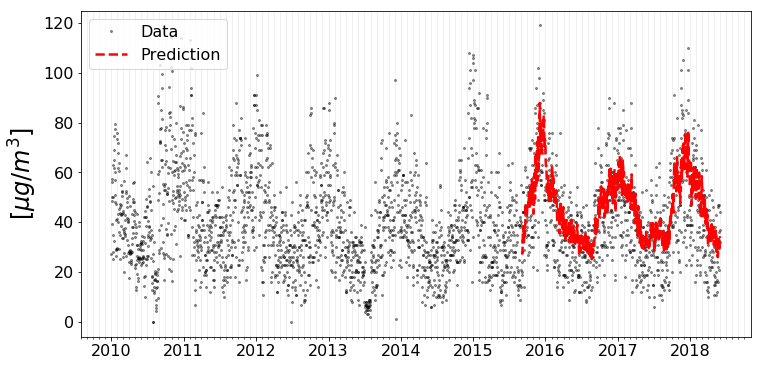

In [24]:
# Dates:
startday = pd.datetime(2010, 1, 1)
startdaypred = pd.datetime(2010, 1, 1) + pd.Timedelta( len(values)-len(pred), unit='d' )
startdayahead = pd.datetime(2010, 1, 1) + pd.Timedelta( len(values), unit='d' )
# Plot:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6)) # (18,6)
plt.figure(1)
xaxis = ax.get_xaxis()
ax.xaxis.grid(b=True, which='minor', color='0.90', linewidth=0.6)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.plot(pd.date_range(startday, periods=len(values), freq='D'), values, "ko", alpha=0.4,markersize=2)
ax.plot(pd.date_range(startdaypred, periods=test_size, freq='D'), pred, linewidth=2.5, alpha=0.99, linestyle='--',color='r' ) 
plt.ylabel(r'$[\mu g/m^3]$', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["Data", "Prediction"], loc='upper left', fontsize=16)
plt.show()